## Исследование данных о российском кинопрокате



**Заказчиком исследования** является `Министерство культуры Российской Федерации` — федеральный орган испольнительной власти, в ведомство которого входит госудраственная политика и нормативно-правовое регулирование, в том числе и в сфере кинематографии.

**Цель исследования** — выявить текущие тренды на рынке российского кинопроката, отдельно уделив внимание фильмам, получившим государственную поддержку.

**Задача исследования** — изучить рынок российского кинопроката. 

Исходные данные для исследования взяты с официального сайта Министрества культуры Российской Федерации. Данные содержат информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с крупнейшего русскоязычного интернет-сервиса о кино — `КиноПоиске`.

### Шаг 1. Изучение данных из файла

In [1]:
# импорт библиотек и методов
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

> Данные для исследования представлены двумя файлами:
> - `mkrf_movies.csv` — файл с данными о прокатных удостоверениях
> - `mkrf_shows.csv` — файл с данными о прокате в российских кинотеатрах

Нам необходимо объединить две таблицы данных в одну, чтобы было удобно работать с полученной информацией. Откроем таблицы и выберем способ объединения датасетов.

In [2]:
# чтение первого файла
df1 = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
# вывод первых десяти строк таблицы
df1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
# чтение второго файла
df2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [5]:
# вывод первых десяти строк таблицы
df2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


Для начала попробуем разобраться в названиях колонок таблиц. Воспользуемся исходными данными.

**Исходные данные**:

Таблица `mkrf_movies`

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` 

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

> У одного фильма может быть несколько прокатных удостоверений.

В обеих таблицах содержится повторяющийся столбец `puNumber`. По данному столбцу осуществим объединение таблиц. Но для начала проверим тип данных столбца в обеих таблицах.

In [6]:
# проверка типа данных таблиц
display(df1.dtypes, df2.dtypes)

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

puNumber        int64
box_office    float64
dtype: object

Тип данных колонки `puNumber` в таблицах различается: в одном датасете тип `object`, в другом  — `int64`. Номер прокатного удостоверения логичнее всего хранить в целочисленном формате, поэтому к нему всё и приведём.

In [7]:
# приведение типа данных
# df1['puNumber'] = df1['puNumber'].astype('int64')

Получаем ошибку: в одной из строк вместо числа записана переменная типа `str` 'нет'. Найдём эту строку с помощью метода *query()*.

In [8]:
# ищем строку, вызвавшую ошибку
display(df1.query('"нет" in puNumber'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Строка найдена. Посмотрим, есть ли у данного фильма ещё один прокатный номер. Для этого отобразим все строки, содержащие фильм *'Курбан-роман. (История с жертвой)'*.

In [9]:
# проверка на наличие другого прокатного номера
display(df1.query('"Курбан-роман. (История с жертвой)" in title'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Убедились, что строк с таким фильмом больше не имеется. К тому же в строке много пропущенных значений. Поэтому отбросим строку с фильмом *'Курбан-роман. (История с жертвой)'*.

In [10]:
# отбрасывание строки с отсутствующим номером
df1 = df1.query('not "Курбан-роман. (История с жертвой)" in title')
# проверка 
display(df1.query('"Курбан-роман. (История с жертвой)" in title'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Снова попробуем привести данные в столбце `puNumber` к типу `int64`.

In [11]:
# приведение типа данных
df1['puNumber'] = df1['puNumber'].astype('int64')
# проверка типа данных
df1.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

Данные приведены к нужному формату. Можем приступать к объединению таблиц. Создадим новую объединённую таблицу `merge_table`.

In [12]:
merge_table = df1.merge(df2, on='puNumber', how='left')
merge_table.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [13]:
# получение общей информации о данных в таблице 'merge_table'
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
# получение сводки числовых значений данных в таблице 'merge_table'
merge_table.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


Проанализируем полученную информацию. Таблица *'merge_table'* cодержит 16 колонок со следующими типами данных:

- `object`
- `int64`
- `float64`

В названиях колонок использованы 2 стиля наименования переменных: *lower_case_with_underscores* и *mixedCase*. Нарушения стилей названия имен отсутствуют.
Количество значений в столбцах различается. Следовательно, в данных есть пропуски.

Минимальные значения в колонках `refundable_support`, `nonrefundable_support`, `budget` равные нулю, могут говорить о том, что фильмы не получили государственной поддержки. Минимальное значение в столбце `box_office` также равно нулю. Это может значить следующее: прокатное удостоверение получено, однако показ фильма ещё не состоялся; состоялся закрытый бесплатный показ киноленты, а остальные зрители ждут премьеру.

**Выводы**

Каждая строка таблицы `merge_table` содержит данные о киноленте, представленной на рынке российского кинопроката. Колонки полученной таблицы предоставляют информацию о названии фильма и его типе и жанровой принадлежности, о производстве киноленты *(студия-производитель, страна-производитель, продюсер, режиссёр)*, о дате премьеры, присвоенном возрастном ограничении, прокатном номере фильма, финансировании *(объём возвратных средств государственной поддержки, объём невозвратных средств государственной поддержки, источник государственного финансирования, общий бюджет фильма)* и рейтинге.

Ориентировочно можно утверждать, что данных достаточно для изучения трендов на рынке российского кинопроката. Однако в данных встречаются пропуски. Возможно наличие дубликатов.

Чтобы проводить исследование, необходимо устранить проблемы в данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

Просмотрим типы данных, имеющиеся в таблице, воспользовавшись атрибутом датафрейма *.info()*.

In [15]:
# проверка типов данных
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Для того чтобы было удобно работать с данными и строить графики в дальнейшем, приведём числовые форматы данных в колонках `refundable_support`, `nonrefundable_support`, `budget`, `box_office` к типу `int`. Значения в столбце `raitings` приведём к типу `float`. 

In [16]:
# приведение данных с пропусками к типу 'int'
columns = ['refundable_support', 'nonrefundable_support', 'budget']
for column in columns:
    merge_table[column] = merge_table[column].astype('float32').astype('Int64')

Для колонки `box_office` воспользуемся другим методом, т.к. при применении вышеизложенного алгоритма возникает ошибка.

In [17]:
# приведение данных столбца 'box_office' к типу 'int'
merge_table['box_office'] = np.floor(pd.to_numeric(merge_table['box_office'], errors='coerce')).astype('Int64')

In [18]:
# проверка типов данных
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  7485 non-null   object
 1   puNumber               7485 non-null   int64 
 2   show_start_date        7485 non-null   object
 3   type                   7485 non-null   object
 4   film_studio            7467 non-null   object
 5   production_country     7483 non-null   object
 6   director               7476 non-null   object
 7   producer               6917 non-null   object
 8   age_restriction        7485 non-null   object
 9   refundable_support     332 non-null    Int64 
 10  nonrefundable_support  332 non-null    Int64 
 11  budget                 332 non-null    Int64 
 12  financing_source       332 non-null    object
 13  ratings                6519 non-null   object
 14  genres                 6510 non-null   object
 15  box_office           

Теперь посмотрим на значения в столбце `ratings`. Для этого выведем уникальные значения, используя метод *unique()*.

In [19]:
# вывод уникальных значений
merge_table['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Во-первых, тип переменных столбца строковый`str`, а нам нужен тип с плавающей запятой `float`. Во-вторых, некоторые значения рейтинга выражены в процентах. Напишем функцию, которая решит сразу обе проблемы.

In [20]:
# функция приведения рейтинга 
def get_rating(row):
    try:
        if row['ratings'] is not None:
            return float(row['ratings'])
    except ValueError:
        return int(row['ratings'].split('%')[0]) / 10

In [21]:
# применение функции к датасету
merge_table['ratings'] = merge_table.apply(get_rating, axis=1)

In [22]:
# вывод уникальных значений
merge_table['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Видим, что у значений без дробной части пропал ноль после запятой. Проверим, правильно ли работают такие числа.

In [23]:
# проверка значений без дробной части
values = ["8", "8.0", "8."]
for value in values:
    display(merge_table.query('@value in ratings').head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Числа без дробной части работают корректно.

In [24]:
# проверка типов данных
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    Int64  
 10  nonrefundable_support  332 non-null    Int64  
 11  budget                 332 non-null    Int64  
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   float64
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**

Типы данных в количественных переменных приведены к типам `int` и `float`. Приступаем к заполнению пропусков.

#### Шаг 2.2. Изучение пропусков в датафрейме

In [25]:
# подсчёт доли пропусков
merge_table.isna().mean().reset_index()

,index,0
0,title,0.000000
1,puNumber,0.000000
2,show_start_date,0.000000
3,type,0.000000
4,film_studio,0.002405
5,production_country,0.000267
6,director,0.001202
7,producer,0.075885
8,age_restriction,0.000000
9,refundable_support,0.955645


Обратим внимание на доли пропусков в столбцах `film_studio`, `production_country`, `director`. Процентное соотношение пропусков и общего количества значений колебелется от 0.12% до 0.24%. Доля пропусков незначительна, поэтому избавимся от этих значений в колонках.

In [26]:
# удаление пропусков в столбцах 'film_studio', 'production_country', 'director'
merge_table = merge_table.dropna(subset=['film_studio', 'production_country', 'director'])

In [27]:
# проверка наличия пропусков
merge_table.isna().mean().reset_index()

,index,0
0,title,0.000000
1,puNumber,0.000000
2,show_start_date,0.000000
3,type,0.000000
4,film_studio,0.000000
5,production_country,0.000000
6,director,0.000000
7,producer,0.075623
8,age_restriction,0.000000
9,refundable_support,0.955484


В колонках `refundable_support`, `nonrefundable_support`, `budget` пропуски означают отсутствие финансовой поддержки от государства, исходя из описания исходных данных в таблице. Однако в вышеперечисленных колонках имеются и нулевые значения. Возможно нулевые значения в этих столбцах говорят о том, что на самом деле поддержки от государства не было, поэтому колонки решили заполнить нулями, в том числе и колонку `budget`. Оставим пропуски в данных столбцах.

Пропуски в колонке `financing_source` также связаны с отсутствием государственной поддержки киноленты. Оставим пропуски и в этой колонке.

Пропуски в столбце `producer` мы не сможем заполнить, т.к. угадать продюсера по названию фильма или другим критериям не получится. Аналогичная ситуация с пропусками в колонке `genres`.

Посмотрим ещё раз на сводку числовых значений данных, чтобы оценить разбросы величин в столбцах `ratings` и `box_office`.

In [28]:
# получение сводки числовых значений данных в таблице 'merge_table'
merge_table.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.458000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6511.000000,3.155000e+03
mean,1.352144e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.487851,7.655133e+07
std,3.835905e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114516,2.404559e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.130001e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.709050e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.338049e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.399546e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


Стандартные отклонения вышеназванных величин значительные, поэтому заполнение пропусков средним значением может исказить действительную картину. Предсказать сборы и рейтинг достаточно сложно, поэтому пропуски заполнять не будем.

**Вывод**

Пропуски значений заполнены. Приступаем к обработке дубликатов.

#### Шаг 2.3. Изучение дубликатов в датафрейме

Явные дубликаты в таблице могли появиться вследствии сбоя программы при сборе или соединении данных. На наличие неявных дубликатов, предположительно, повлиял свободный формат ввода данных в ячейку, при котором пользователи имели возможность ошибиться.

Перед тем как приступать к подсчёту дубликатов, приведем все категориальные данные в таблице к *нижнему регистру*, чтобы не упускать дубликаты:

In [29]:
# приведение данных к нижнему регистру
columns = ['title', 'type', 'film_studio',
           'production_country', 'director', 'producer',
           'age_restriction', 'financing_source', 'genres']
for column in columns:
    merge_table[column] = merge_table[column].str.lower()

Теперь можно вести подсчёт дубликатов:

In [30]:
# подсчёт явных дуликатов
print('Количество явных дубликатов: {}'.format(merge_table.duplicated().sum()))

Количество явных дубликатов: 0


Теперь проверим датафрейм на наличие дублирующихся значений в колонке `puNumber`.

In [31]:
# вывод дублей столбца 'puNumber'
merge_table[merge_table.duplicated(subset='puNumber')].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17T12:00:00.000Z,художественный,"константин фильм, а эр ди дегето фильм, дюне ...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,NaN,7.6,"драма,мелодрама,история",<NA>
5067,анализируй то!,221054410,2010-05-25T12:00:00.000Z,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,NaN,6.8,"комедия,криминал",<NA>


In [32]:
# удаление дубликатов в столбце 'puNumber'
merge_table = merge_table.drop_duplicates(subset='puNumber')

In [33]:
# проверка наличия дубликатов в столбце 'puNumber'
merge_table.duplicated(subset='puNumber').sum()

0

**Вывод**

Обработка данных на наличие дубликатов завершена. Дубликаты удалены.

#### Шаг 2.4. Изучение категориальных значений

Во многих категориальных столбцах датасета записано не одно значение переменной, а несколько через запятую в строку или столбец в одной ячейке. Это визуально усложняет восприятие данных. Такую проблему можно решить созданием дополнительных столбцов, выделяющих основную информацию. Этим займёмся на последнем шаге *предобработки данных*.

Просмотрим уникальные значения колонки `type`.

In [34]:
# вывод уникальных значений столбца 'type'
merge_table['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', ' художественный', ' анимационный',
       'музыкально-развлекательный'], dtype=object)

Уменьшим количество уникальных значений, удалив отступы. Воспользуемся методом *.str.strip()*.

In [35]:
# удаление отступов
merge_table['type'] = merge_table['type'].str.strip()

In [36]:
# вывод уникальных значений столбца 'type'
merge_table['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

**Вывод**

Категориальный столбец `type` приведён к единому формату.

#### Шаг 2.5. Проверка количественных значений

В таблице `merge_table` имеем взаимосвязанные колонки `refundable_support`, `nonrefundable_support`, `budget`. В общий бюджет фильма уже входят средства, выделенные государством. Для представления общей картины средств, потраченных на создание фильма, необходимо добавить столбец с долей государственных средств от общего бюджета. Этим займёмся на слудующем шаге.

Пока создадим столбец `support`, в котором посчитаем общую сумму средств, выделенных государством.

In [37]:
# создание столбца 'support'
merge_table.insert(12, 'support', merge_table['refundable_support'] + merge_table['nonrefundable_support'])

In [38]:
# просмотр таблицы с созданным столбцом
pd.set_option('display.max_colwidth', -1)
merge_table.query('support != 0').head(10)

/tmp/ipykernel_183/1209004216.py:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office
1281,пока еще жива,111005313,2013-10-11T12:00:00.000Z,художественный,"ано содействия развитию кинематографии ""ангел-фильм"", ооо ""кинокомпания отражение""",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0,26500000,79411904,26500000,министерство культуры,8.1,"драма,мелодрама",365353
1448,бесславные придурки,111003314,2014-03-28T12:00:00.000Z,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142856,26000000,министерство культуры,NaN,NaN,28140
1498,невидимки,111004213,2013-09-10T12:00:00.000Z,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0,107847944,176023488,107847944,фонд кино,5.3,"комедия,фантастика",19957031
1524,берцы,111004314,2014-05-05T12:00:00.000Z,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,28000000,министерство культуры,4.2,драма,55917
1792,братья ч,111004414,2014-04-23T12:00:00.000Z,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0,25000000,40015120,25000000,министерство культуры,6.4,драма,232100
1853,тайна сухаревой башни. чародей равновесия,114000115,2015-02-18T12:00:00.000Z,анимационный,"ооо ""студия ""мастер-фильм""",россия,с.серегин,а.герасимов,«6+» - для детей старше 6 лет,0,25000000,51850000,25000000,министерство культуры,6.1,"мультфильм,фэнтези,история",15078858
1869,а зори здесь тихие..._,111002915,2015-03-16T12:00:00.000Z,художественный,"ооо ""компания ""реал-дакота""",россия,р.давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000,100000000,220588400,150000000,фонд кино,8.5,"драма,военный,история",249166767
1870,две женщины,111013714,2014-10-02T12:00:00.000Z,художественный,"ооо ""продюсерский центр ""хорошо продакшн"", rezo productions, jura podnieka studija","россия, франция, латвия",в.глаголева,н.иванова,«12+» - для детей старше 12 лет,0,46502300,86210064,46502300,"министерство культуры, фонд кино",6.7,драма,4731239
1902,призрак_.,111001815,2015-03-02T12:00:00.000Z,художественный,"ооо ""водород 2011""",россия,а.войтинский,с.сельянов,«6+» - для детей старше 6 лет,0,75000000,139551504,75000000,фонд кино,7.0,"триллер,боевик,приключения",352804320
1911,ведьма .,111002215,2015-03-05T12:00:00.000Z,художественный,"ооо ""кинокомпания ""ракурс""",россия,д.федоров,в.сидоренко,«16+» - для детей старше 16 лет,0,34000000,48571432,34000000,министерство культуры,7.4,"фэнтези,приключения,драма",51907


Проверим количественные значения на наличие аномалий. Посмотрим, есть ли такие киноленты, у которых объём средств, выделенных государством, ненулевой, а бюджет фильма нулевой.

In [39]:
# проверка на наличие аномальных значений
pd.set_option('display.max_colwidth', -1)
merge_table.query('support != 0 and budget == 0')

/tmp/ipykernel_183/3248230989.py:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19T12:00:00.000Z,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0,23000000,0,23000000,"министерство культуры, фонд кино",6.6,мелодрама,10234016
2057,дуxless 2,111000415,2015-01-26T12:00:00.000Z,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0,75000000,0,75000000,фонд кино,6.6,драма,446163511
2471,воин (2015),111017315,2015-09-28T12:00:00.000Z,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,80000000,фонд кино,7.8,"боевик,драма,криминал",196572438
2531,бармен.,111009615,2015-05-26T12:00:00.000Z,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,20000000,фонд кино,6.2,"комедия,фэнтези",67418974
2614,савва. сердце воина,114001715,2015-07-21T12:00:00.000Z,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,160000000,фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551
2683,тряпичный союз,111010215,2015-06-08T12:00:00.000Z,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0,59000000,0,59000000,фонд кино,6.3,"комедия,драма",1957738
2787,срочно выйду замуж,111017115,2015-09-30T12:00:00.000Z,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0,35000000,0,35000000,фонд кино,5.1,"комедия,мелодрама",72937783
2873,помню - не помню!,111004916,2016-03-01T12:00:00.000Z,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0,6000000,0,6000000,министерство культуры,4.3,комедия,15362931
3046,любовь с ограничениями,111008216,2016-04-29T12:00:00.000Z,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,70000000,фонд кино,6.3,"комедия,мелодрама",70299052
3564,притяжение (2016),111018116,2016-12-16T12:00:00.000Z,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0,250000000,0,250000000,фонд кино,5.6,фантастика,1038321489


In [40]:
merge_table.isna().mean()

title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.000000
production_country       0.000000
director                 0.000000
producer                 0.075644
age_restriction          0.000000
refundable_support       0.955472
nonrefundable_support    0.955472
budget                   0.955472
support                  0.955472
financing_source         0.955472
ratings                  0.127012
genres                   0.128219
box_office               0.576851
dtype: float64

Аномальные переменные имеются. Для них заполним колонку `budget` значением из колонки `support`.

In [41]:
# заполнение столбца 'budget' с помощью функции
def budget_supp(row):
    if str(row['support']) != '<NA>' and str(row['budget']) != '<NA>':
        if row['support'] != 0 and row['budget'] == 0:
            row['budget'] = row['support']
        else:
            return row['budget']
    else:
        return row['budget']
# применение функции        
merge_table['budget'] = merge_table.apply(budget_supp, axis=1).astype('Int64')

In [42]:
merge_table.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27T12:00:00.000Z,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>
1,особо важное задание,111013716,2016-09-13T12:00:00.000Z,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>
2,особо опасен,221038416,2016-10-10T12:00:00.000Z,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
3,особо опасен,221026916,2016-06-10T12:00:00.000Z,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
4,особо опасен,221030815,2015-07-29T12:00:00.000Z,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>


In [43]:
# проверка наличия нулевых бюджетов
merge_table.query('support != 0 and budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office


**Вывод**

Количественные значения обработаны. Продолжаем предобработку данных.

#### Шаг 2.6. Добавление новых столбцов

Создим столбец с информацией о годе проката. Приведём дату к формату `datetime` и выделим год с помощью атрибута *.dt.year*.

In [44]:
# приведение даты к формату 'datetime'
merge_table['show_start_date'] = pd.to_datetime(merge_table['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# создание столбца с годом премьеры
merge_table.insert(3, 'show_start_year', merge_table['show_start_date'].dt.year)
merge_table.head(10)

,title,puNumber,show_start_date,show_start_year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,2015,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>
1,особо важное задание,111013716,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>
2,особо опасен,221038416,2016-10-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
3,особо опасен,221026916,2016-06-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
4,особо опасен,221030815,2015-07-29 12:00:00,2015,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>
5,остановился поезд,111013816,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,<NA>,NaN,7.7,драма,<NA>
6,любовь и голуби,111007013,2013-10-18 12:00:00,2013,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,<NA>,NaN,8.3,"мелодрама,комедия",2700
7,любовь и сигареты,221074614,2014-12-29 12:00:00,2014,художественный,"юнайтед артистс, грин стрит филмз, айкон интертейнмент интернэшнл",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.6,"мюзикл,мелодрама,комедия",<NA>
8,отпетые мошенники.,121011416,2016-05-05 12:00:00,2016,художественный,"пульсар продюксьон, тф1 фильм",франция,эрик беснард,патрис леду,«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,8.0,"комедия,криминал",<NA>
9,отпуск за свой счет,111019114,2014-12-01 12:00:00,2014,художественный,"киностудия ""мосфильм"", телевидение внр","ссср, венгрия",в.титов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,<NA>,NaN,7.8,"мелодрама,комедия",<NA>


Также создадим ещё два дополнительных столбца: 
>- с именем и фамилией главного продюсера
>- с основным жанром фильма

В столбцы войдут первые значения из списка продюсеров и жанров соответственно.

In [45]:
# создание дополнительных столбцов в отдельной таблице
columns = ['producer', 'genres']
table_first_values = pd.DataFrame() 
for column in columns:
    def get_first_value(data):
        try:
            if not pd.isna(data[column]):
                return data[column].split(',')[0]
        except ValueError:
            return None
        
    table_first_values[column] = merge_table.apply(get_first_value, axis=1)

# вывод первых десяти значений таблицы
display(table_first_values.head(10))

,producer,genres
0,дэвид валдес,боевик
1,None,драма
2,джим лемли,фантастика
3,джим лемли,фантастика
4,джим лемли,фантастика
5,None,драма
6,None,мелодрама
7,джон пенотти,мюзикл
8,патрис леду,комедия
9,None,мелодрама


Теперь объединим таблицы `merge_table` и `table_first_values`, используя метод *join()*.

In [46]:
# объединение двух таблиц
merge_table = merge_table.join(table_first_values, lsuffix='_x', rsuffix='_y')
display(merge_table.head(10))

,title,puNumber,show_start_date,show_start_year,type,film_studio,production_country,director,producer_x,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres_x,box_office,producer_y,genres_y
0,открытый простор,221048915,2015-11-27 12:00:00,2015,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>,дэвид валдес,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>,None,драма
2,особо опасен,221038416,2016-10-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00,2015,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика
5,остановился поезд,111013816,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,<NA>,NaN,7.7,драма,<NA>,None,драма
6,любовь и голуби,111007013,2013-10-18 12:00:00,2013,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,<NA>,NaN,8.3,"мелодрама,комедия",2700,None,мелодрама
7,любовь и сигареты,221074614,2014-12-29 12:00:00,2014,художественный,"юнайтед артистс, грин стрит филмз, айкон интертейнмент интернэшнл",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.6,"мюзикл,мелодрама,комедия",<NA>,джон пенотти,мюзикл
8,отпетые мошенники.,121011416,2016-05-05 12:00:00,2016,художественный,"пульсар продюксьон, тф1 фильм",франция,эрик беснард,патрис леду,«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,8.0,"комедия,криминал",<NA>,патрис леду,комедия
9,отпуск за свой счет,111019114,2014-12-01 12:00:00,2014,художественный,"киностудия ""мосфильм"", телевидение внр","ссср, венгрия",в.титов,NaN,«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,<NA>,NaN,7.8,"мелодрама,комедия",<NA>,None,мелодрама


In [47]:
# изменение названий столбцов 
merge_table = merge_table.rename(columns={'producer_x':'producers', 'producer_y':'producer',
                                          'genres_x':'genres', 'genres_y':'genre'})

In [48]:
# проверка названий столбцов
display(merge_table.head())

,title,puNumber,show_start_date,show_start_year,type,film_studio,production_country,director,producers,age_restriction,refundable_support,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office,producer,genre
0,открытый простор,221048915,2015-11-27 12:00:00,2015,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>,дэвид валдес,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>,None,драма
2,особо опасен,221038416,2016-10-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика
3,особо опасен,221026916,2016-06-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика
4,особо опасен,221030815,2015-07-29 12:00:00,2015,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка и запишем значения в столбец `support/budget`.

In [49]:
# расчёт доли государственной поддержки
merge_table['support/budget'] = merge_table['support'] / merge_table['budget']
# вывод последних десяти значений
display(merge_table.head(10))

,title,puNumber,show_start_date,show_start_year,type,film_studio,production_country,director,producers,age_restriction,...,nonrefundable_support,budget,support,financing_source,ratings,genres,box_office,producer,genre,support/budget
0,открытый простор,221048915,2015-11-27 12:00:00,2015,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,...,<NA>,<NA>,<NA>,NaN,7.2,"боевик,драма,мелодрама",<NA>,дэвид валдес,боевик,<NA>
1,особо важное задание,111013716,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,...,<NA>,<NA>,<NA>,NaN,6.6,"драма,военный",<NA>,None,драма,<NA>
2,особо опасен,221038416,2016-10-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,...,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика,<NA>
3,особо опасен,221026916,2016-06-10 12:00:00,2016,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,...,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика,<NA>
4,особо опасен,221030815,2015-07-29 12:00:00,2015,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,...,<NA>,<NA>,<NA>,NaN,6.8,"фантастика,боевик,триллер",<NA>,джим лемли,фантастика,<NA>
5,остановился поезд,111013816,2016-09-13 12:00:00,2016,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,...,<NA>,<NA>,<NA>,NaN,7.7,драма,<NA>,None,драма,<NA>
6,любовь и голуби,111007013,2013-10-18 12:00:00,2013,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,...,<NA>,<NA>,<NA>,NaN,8.3,"мелодрама,комедия",2700,None,мелодрама,<NA>
7,любовь и сигареты,221074614,2014-12-29 12:00:00,2014,художественный,"юнайтед артистс, грин стрит филмз, айкон интертейнмент интернэшнл",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,...,<NA>,<NA>,<NA>,NaN,6.6,"мюзикл,мелодрама,комедия",<NA>,джон пенотти,мюзикл,<NA>
8,отпетые мошенники.,121011416,2016-05-05 12:00:00,2016,художественный,"пульсар продюксьон, тф1 фильм",франция,эрик беснард,патрис леду,«18+» - запрещено для детей,...,<NA>,<NA>,<NA>,NaN,8.0,"комедия,криминал",<NA>,патрис леду,комедия,<NA>
9,отпуск за свой счет,111019114,2014-12-01 12:00:00,2014,художественный,"киностудия ""мосфильм"", телевидение внр","ссср, венгрия",в.титов,NaN,«12+» - для детей старше 12 лет,...,<NA>,<NA>,<NA>,NaN,7.8,"мелодрама,комедия",<NA>,None,мелодрама,<NA>


Создадим новую таблицу, оставив только те столбцы, на основании которых будем проводить анализ данных.

In [50]:
# обновление таблицы для последующего анализа данных
result_table = merge_table[['title', 'puNumber', 'show_start_year', 'type', 'film_studio',
                 'production_country', 'director', 'producer', 'age_restriction',
                'support', 'budget', 'financing_source', 'ratings', 'genre',
                'box_office', 'support/budget']]
# вывод первых десяти строк таблиц
result_table.tail(10)

,title,puNumber,show_start_year,type,film_studio,production_country,director,producer,age_restriction,support,budget,financing_source,ratings,genre,box_office,support/budget
7475,я свободен,111023019,2019,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,и.северов,с.зернов,«12+» - для детей старше 12 лет,30000000,46154000,министерство культуры,5.9,драма,<NA>,0.649998
7476,тридцать,121038419,2019,художественный,демнехст ауф видео,германия,симона костова,джейлан атаман-джека,«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,6.3,драма,<NA>,<NA>
7477,(не)идеальный мужчина,111023119,2019,художественный,"ооо ""нон-стоп продакшн""",россия,м.бальчюнас (псевдоним м.вайсберг),с.мелькумов,«12+» - для детей старше 12 лет,100000000,150147504,фонд кино,4.5,комедия,<NA>,0.666012
7478,эколав,111023219,2019,художественный,вгик,россия,д.григорьев,вгик,«18+» - запрещено для детей,<NA>,<NA>,NaN,NaN,None,<NA>,<NA>
7479,акрам хан: родом из карри хауса,126007919,2019,прочие,свон филмз,великобритания,ник пойнц,поппи бегум,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,None,219569,<NA>
7480,сад художника: американский импрессионизм,126008019,2019,прочие,севен артс продакшнз,великобритания,фил грабски,фил грабски,«12+» - для детей старше 12 лет,<NA>,<NA>,NaN,NaN,None,<NA>,<NA>
7481,звериная ярость,121037819,2019,художественный,"дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента",сша,ник пауэлл,джефф боулер,«16+» - для детей старше 16 лет,<NA>,<NA>,NaN,5.4,боевик,<NA>,<NA>
7482,щенячий патруль: скорей спешим на помощь!,124010819,2019,художественный,"никелодеон анимейшн студиос, спин мастер",сша - канада,чарльз е.бастьен,дженнифер додж,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,None,<NA>,<NA>
7483,"машины песенки. серия ""испанские мотивы""",124010619,2019,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",а.беляев,д.ловейко,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,NaN,None,<NA>,<NA>
7484,"машины песенки. серия ""когда цветут кактусы""",124010719,2019,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",и.трусов,д.ловейко,«0+» - для любой зрительской аудитории,<NA>,<NA>,NaN,6.3,комедия,<NA>,<NA>


**Вывод**

Все необходимые параметры рассчитаны и добавлены в таблицу. Можно переходить к анализу данных.

### Шаг 3. Исследовательский анализ данных


Для начала проанализируем динамику выхода фильмов в прокат. Посмотрим, сколько фильмов выходило каждый год c помощью графика, используя для построения методы *pivot_table()* и *plot()*. В нашем исследовании используем информацию только о тех кинолентах, для которых известны кассовые сборы, чтобы правильно проанализировать полную картинку данных.

[Text(0.5, 1.0, 'Количество фильмов, выходивших в прокат в разные года'),
 Text(0, 0.5, 'films quantity'),
 Text(0.5, 0, 'years')]

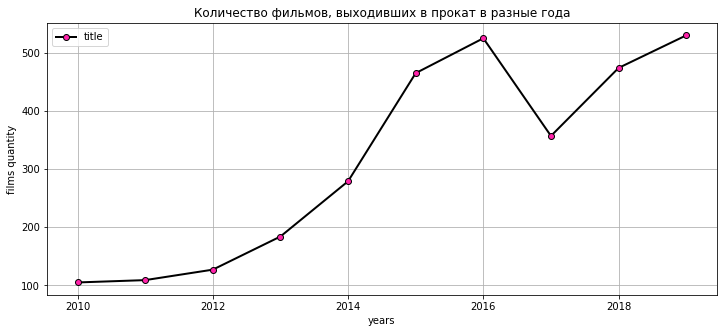

In [51]:
# построение графика
ax = result_table.query('box_office >= 0').pivot_table(index='show_start_year', values='title', aggfunc='count').plot(
                   figsize=(12, 5), grid=True, linewidth=2, linestyle='-', marker='o', color='k', markerfacecolor='#ff22aa')
ax.set(title='Количество фильмов, выходивших в прокат в разные года',
       ylabel='films quantity',
       xlabel='years')

Больше всего фильмов, с имеющейся информацией о сборах, вышло в 2016 и 2019 годах (около 530 кинолент). С 2010 по 2016 год количество выпущенных в прокат фильмов с каждым годом возрастало. В 2017 году видим спад кинопроизводства. К 2019 году количество выпущенных фильмов вышло на показатели 2010 года.

Однако не для всех кинолент имеется информация о прокате в кинотеатрах. Посчитаем долю фильмов с указанной информацией о прокате, т.е. с заполненной колонкой `box_office`.

In [52]:
# доля фильмов с известной информацией о прокате
filled_data = 1 - (result_table['box_office'].isna().mean())
print(filled_data)

0.42314914163090134


> Мы получили данные о прокате лишь для 42% процентов кинолент, вышедших с 2010 по 2019 год. Это означает, что картина может быть искажённой. 

Теперь проследим за динамикой изменения суммы сборов в зависимости от года.

[Text(0.5, 1.0, 'Сумма сборов в разные года'),
 Text(0, 0.5, 'box_office / rubles'),
 Text(0.5, 0, 'years')]

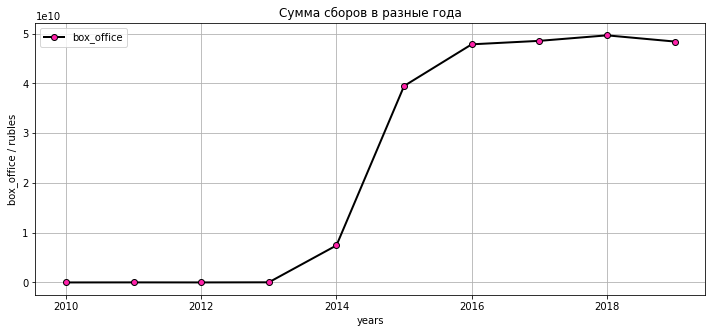

In [53]:
# построение графика с 2010 по 2019 год
ax = result_table.pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot(
                  figsize=(12, 5), grid=True, linewidth=2, linestyle='-', marker='o',
                  color='k', markerfacecolor='#ff22aa')
ax.set(title='Сумма сборов в разные года',
       ylabel='box_office / rubles',
       xlabel='years')

Построим укрупнённый график для суммы сборов в период с 2010 по 2013 год, т.к. на линия графика в этот период времени сливается с координационной сеткой.

([<matplotlib.axis.XTick at 0x7fc681585eb0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

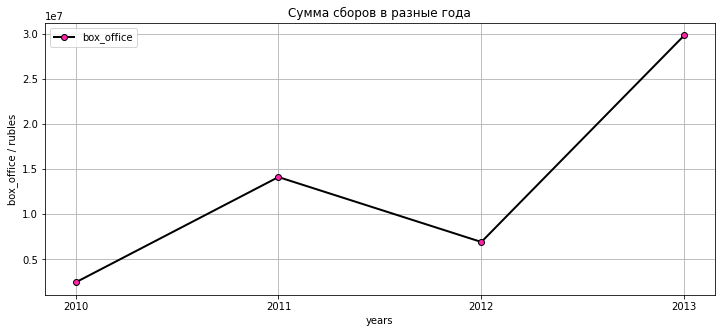

In [54]:
# построение графика с 2010 по 2013 год
ax = result_table.query('show_start_year < 2014').pivot_table(index='show_start_year', values='box_office', aggfunc='sum').plot(
                  figsize=(12, 5), grid=True, linewidth=2, linestyle='-', marker='o',
                  color='k', markerfacecolor='#ff22aa')
ax.set(title='Сумма сборов в разные года',
       ylabel='box_office / rubles',
       xlabel='years')
plt.xticks([2010, 2011, 2012, 2013])

Сумма кассовых сборов в период с 2010 по 2013 год то падала, то возрастала, но колебалась в пределах 30 млн руб. Далее кассовые сборы резко взлетели вверх до отметки около 50 млрд руб в 2016 году, около отметки в 50 млрд руб сумма сборов меняется вплоть до 2019 года. Минимальная сумма сборов приходится на 2010 год, максимальная —  на 2019 год.

С 2010 по 2016 год характер графика *суммы сборов в разные года* и графика *количество фильмов, выходивших в прокат в разные года* cхожий, однако в 2017 году суммы сборов находятся на прежнем уровне относительно 2016 года, а количество произведённых кинокартин упало. Возможно в этот период выпустили большое количество стоящих кинолент, которые собрали кассы. К 2019 году и количество фильмов, и сборы выходят на уровень 2016 года.

Посмотрим на среднюю и медианную суммы сборов для каждого года. По ним оценим равномерность распределения. Для этого создадим сводную таблицу с помощью метода *pivot_table()*.

In [55]:
# создание сводной таблицы сборов для каждого года
box_office_table = result_table.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
display(box_office_table)

,mean,median
,box_office,box_office
show_start_year,,
2010,23130.038095,1700.0
2011,129383.165138,3000.0
2012,54417.897638,5560.0
2013,161954.913043,3522.5
2014,26684415.193548,18160.0
2015,84940570.025806,4920933.0
2016,91173533.464762,3915041.0
2017,136032793.316527,9968340.0


Среднее значение кассовых сборов в большинстве случаев значительно превышает медианное значение. Это говорит о том, что у нас в данных есть такие киноленты, которые зарабатывают бóльшую часть средств, поэтому *перетягивают* среднее значение на себя. Построим гистограмму распределения сборов для 2019 года, чтобы визуально посмотреть на характер распределения выручки от проката фильмов.

[Text(0.5, 1.0, 'Распределение суммы сборов кинолент за 2019 год'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'box_office')]

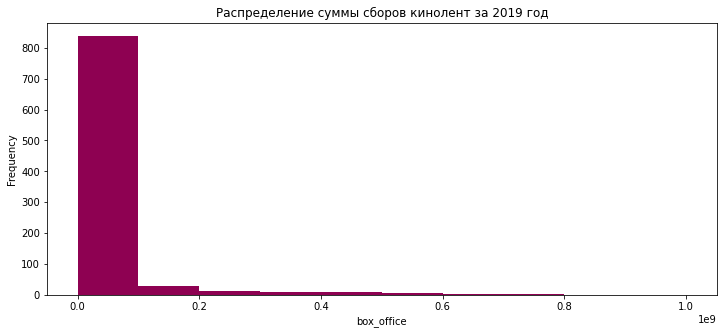

In [56]:
# построение гистграммы распределения суммы сборов
ax = result_table.query('show_start_year > 2018').groupby('title')['box_office'].sum().plot(
    kind='hist', range=(0, 1000000000), figsize=(12, 5), colormap='PiYG')
ax.set(title='Распределение суммы сборов кинолент за 2019 год',
       ylabel='Frequency',
       xlabel='box_office')

На графике получаем следующее: бóльшая часть кинолент не собирает значительной выручки. Самыми кассовыми фильмами становятся единицы.

Теперь посмотрим, как возрастное ограничение сказывается на кассовых сборах.

[Text(0.5, 1.0, 'Распределение суммы сборов в зависимости от возрастного ограничения фильма'),
 Text(0, 0.5, 'box_office / rubles'),
 Text(0.5, 0, 'age_restriction')]

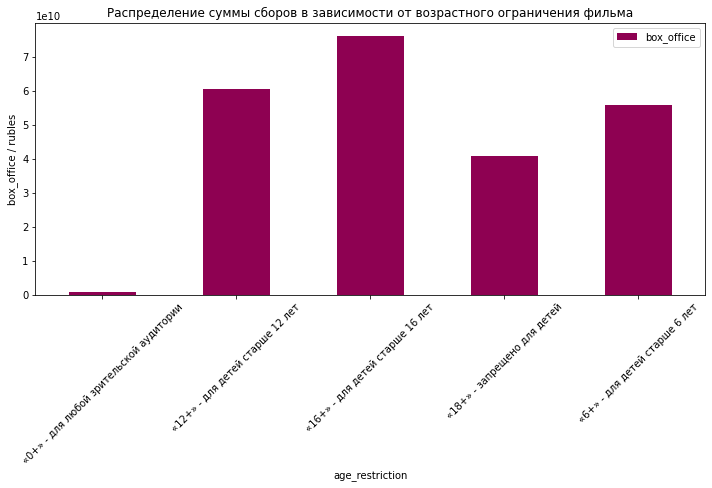

In [57]:
# построение графика распределения суммы сборов в зависимости от возрастного ограничения
ax = result_table.query(
    '2015 <= show_start_year <= 2019').pivot_table(
    index='age_restriction', values='box_office', aggfunc='sum').plot(
    kind='bar', figsize=(12, 5), colormap='PiYG', rot=45)
ax.set(title='Распределение суммы сборов в зависимости от возрастного ограничения фильма',
       ylabel='box_office / rubles',
       xlabel='age_restriction')

Получаем следующую картину: больше всего средств собирают киноленты с возрастным ограничением '16+', меньше всего — с возрастным ограничением '0+'. Фильмы с возрастными ограничениями в '6+' и '12+' находятся примерно на одном уровне.

Проверим, меняется ли тенденция из года в год. На одном графике отобразим зависимость для каждого года.

([<matplotlib.axis.XTick at 0x7fc679454f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

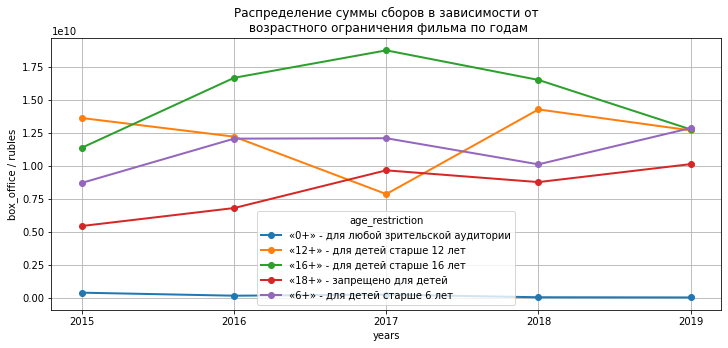

In [58]:
# построение графика распределения суммы сборов в зависимости от возрастного ограничения по годам
ax = result_table.query(
    '2015 <= show_start_year <= 2019').pivot_table(
    index='show_start_year', columns ='age_restriction', values='box_office', aggfunc='sum').plot(
    figsize=(12, 5), grid=True, linewidth=2, linestyle='-', marker='o')
ax.set(title=f'Распределение суммы сборов в зависимости от\n возрастного ограничения фильма по годам',
       ylabel='box_office / rubles',
       xlabel='years')
plt.xticks([2015, 2016, 2017, 2018, 2019])

Из графика видим, что фильмы сегмента '12+' из года в год меняют своё положение в рейтинге сборов. Возможно такая ситуация складывается из-за снижения/повышения возрастного ограничения на киноленты данного сегмента.

**Вывод**

В результате исследовательского анализа изучены тенденции на рынке кинопроката.

### Шаг 4. Исследование фильмов, получивших государственную поддержку

Проанализируем, как менялось государственное финансирование кинопроката с течением времени и какую долю оно составляло от общего бюджета фильмов. Для этого создадим функцию *plotly_scatter()*.

In [59]:
# функция для построения графика библиотеки 'plotly' типа 'Scatter'
def plotly_scatter(column_1, column_2, title):
    
# создание таблицы фильмов, получивших господдержку
    sup_table = result_table.query('support >= 0 and box_office >= 0')
# формирование таблицы для построения графика
    graphic_table = sup_table.groupby('show_start_year')[[column_1]].sum().join(
    sup_table.groupby('show_start_year')[[column_2]].sum()
)
    graphic_table.columns = [column_1, column_2]

# линия графика для бюджета
    trace0 = go.Scatter(
        x=graphic_table.index,
        y=graphic_table[column_1],
        name=column_1
)

# линия графика для государственных средств
    trace1 = go.Scatter(
        x=graphic_table.index,
        y=graphic_table[column_2],
        name=column_2
)

# определение массива данных и определение title графика в layout
    data = [trace0, trace1]
    layout = {'title': title}

# cоздание объекта Figure и его визуализация
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(yaxis_title="box_office/rubles")
    fig.update_xaxes(tick0=0, dtick=1)
    iplot(fig, show_link=False)

In [60]:
# создание графика распределения финансирования и бюджета
plotly_scatter('budget', 'support', 'Распределение финансирования и бюджета кинолент по годам')

Государственная поддержка составляет половину и более средств от целого бюджета фильма. Лишь в 2019 году доля средств государственного финансирования составляла меньше 50% бюджета.

Теперь посмотрим, как окупаются киноленты, спонсированные государством.

In [61]:
# создание графика окупаемости кинолент
plotly_scatter('budget', 'box_office', 'Окупаемость кинолент')

Спонсированные фильмы окупились только в 2017 и 2018 годах, в остальное время картины не приносили дохода.

Далее визуализируем динамику рейтинга фильмов по медианным значениям за каждый год.

In [62]:
# создание таблицы фильмов, получивших господдержку
sup_table = result_table.query('support >= 0 and box_office >= 0')
# создание таблицы для построения диаграммы
graphic_table = sup_table.groupby('show_start_year')[['ratings']].median()
# формирование диаграммы
trace0 = go.Bar(
    x=graphic_table.index,
    y=graphic_table.ratings,
    name='ratings'
)
# определение массива данных и определение title графика в layout
data=trace0
layout = {'title': 'Рейтинг кинолент по годам', 'height': 500, 'width': 1000}

# cоздание объекта Figure и его визуализация
fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis_title="raitings")
fig.update_xaxes(tick0=0, dtick=1)
iplot(fig, show_link=False)

На протяжении всего промежутка времени рейтинг кинолент не достиг отметки в 7 баллов. Максимальный медианный рейтинг спонсированных государством фильмов составляет 6.7 баллов, минимальный — 5.8 баллов.

Сгруппируем данные по жанрам и посмотрим, у каких жанров наивысший рейтинг. Выведем на диаграмме 10 самых рейтинговых жанров.

In [63]:
# создание таблицы для построения диаграммы
graphic_table = sup_table.groupby('genre')[['ratings']].median().sort_values(by='ratings', ascending=False).head(10)

# формирование диаграммы
trace0 = go.Bar(
    x=graphic_table.index,
    y=graphic_table.ratings,
    name='ratings'
)
# определение массива данных и определение title графика в layout
data=trace0
layout = {'title': 'Топ-10 рейтинговых жанров', 'height': 500, 'width': 1000}

# cоздание объекта Figure и его визуализация
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(dtick="0, 1")
fig.update_layout(xaxis_title="genres",
                  yaxis_title="raitings")
iplot(fig, show_link=False)

Пятёрку рейтинговых жанров составляют следующие:
- `криминал`
- `детский`
- `спорт`
- `биография`
- `фэнтези` и `детектив`

Проанализируем, каких кинолент выпускали большего всего и совпадают ли *топ-10 кинолент по количеству выпущенных фильмов* и *топ-10 рейтинговых кинолент*.

In [64]:
# создание таблицы для построения диаграммы
graphic_table = sup_table.groupby('genre')[['title']].count().sort_values(by='title', ascending=False).head(10)
# формирование диаграммы
trace0 = go.Bar(
    x=graphic_table.index,
    y=graphic_table.title,
    name='title'
)
# определение массива данных и определение title графика в layout
data=trace0
layout = {'title': 'Топ-10 жанров по количеству выпущенных кинолент', 'height': 500, 'width': 1000}

# cоздание объекта Figure и его визуализация
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(dtick="0, 1")
fig.update_layout(xaxis_title="genres",
                  yaxis_title="quantity")
iplot(fig, show_link=False)

Пятёрку жанров по кличеству выпущенных фильмов составляют следующие:
- `драма`
- `комедия`
- `мультфильм`
- `триллер`
- `мелодрама`

Получается, что бóльшую часть выпускаемой продукции представляют те фильмы, которые не пользуются большой популярностью у зрителя.

**Вывод**

Выявлены закономерности в данных для фильмов, спонсированных государством.

### Шаг 5. Общий вывод

На рынке российского кинопроката выявлены следующие тенденции. Сумма кинопрокатных сборов после резкого роста с 2013 по 2016 год стабилизировалась. Однако распределение выручки неравномерное. Определённые фильмы *выстреливают* и собирают кассы, другие не получают прибыли, или их прибыль не составляет значительной доли от всей прибыли за год. Возрастное ограничение влияет на успех фильма, но спрос на киноленты какого-либо возрастного ограничения может поменяться с течением времени.

Картины, получившие поддержку от государства, не пользуются особой популярностью. Максимальный рейтинг таких кинолент не достигает 7 баллов. Государство в большинстве случаев вкладывают половину и более средств, требуемых для реализации картины. Но фильмы часто не окупаются. Любимыми жанрами зрителей среди спонсированных фильмов являются *криминал, детский, спорт*. Чаще всего снимают картины жанров: *драма, комедия, мультфильм*.